## Presentation of distributed data collection - Where are the birds?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Datei einlesen
file_path = "only_calls.csv"
df = pd.read_csv(file_path)

# Die ersten Zeilen anzeigen, um die Struktur zu verstehen
df.head()


,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,abethr1,[],['call'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363501,abethr1/XC363501.ogg
1,abethr1,[],"['call', 'song']",-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,4.5,https://www.xeno-canto.org/363504,abethr1/XC363504.ogg
2,abethr1,[],"['call', 'song']",-2.9965,37.6244,Turdus tephronotus,African Bare-eyed Thrush,isaac kilusu,Creative Commons Attribution-NonCommercial-Sha...,3.0,https://www.xeno-canto.org/432639,abethr1/XC432639.ogg
3,abethr1,[],"['adult', 'call', 'sex uncertain', 'song']",-2.9858,37.5975,Turdus tephronotus,African Bare-eyed Thrush,isaac kilusu,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/639039,abethr1/XC639039.ogg
4,abhori1,['combul2'],"['call', 'song']",-15.9259,29.0292,Oriolus larvatus,African Black-headed Oriole,Rory Nefdt,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/120250,abhori1/XC120250.ogg


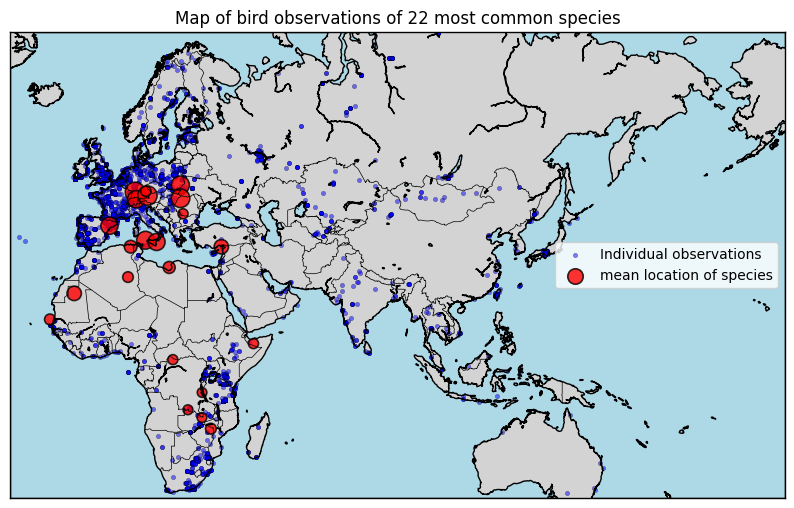

In [16]:

# Die 22 häufigsten 'common_name' Werte ermitteln
top_common_names = df["common_name"].value_counts().head(22).index

# Daten filtern nach den Top 22 häufigsten common_names
filtered_df = df[df["common_name"].isin(top_common_names)]

# Gruppieren nach 'common_name' und den Mittelpunkt der Koordinaten berechnen sowie die Häufigkeit zählen
grouped_df = filtered_df.groupby("common_name").agg(
    latitude=("latitude", "mean"),
    longitude=("longitude", "mean"),
    count=("common_name", "count")
).reset_index()

# Alle Datenpunkte für die 22 häufigsten Arten verwenden
filtered_lats = filtered_df["latitude"].values
filtered_lons = filtered_df["longitude"].values

# Neue Karte mit allen Datenpunkten erstellen
fig, ax = plt.subplots(figsize=(10, 10))
m = Basemap(projection='merc', 
            llcrnrlat=-36, urcrnrlat=72, 
            llcrnrlon=-30, urcrnrlon=210, 
            resolution='l', ax=ax)

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgray', lake_color='lightblue')

# Koordinaten umwandeln
x_all, y_all = m(filtered_lons, filtered_lats)

# Streudiagramm mit besser sichtbaren Markierungen
ax.scatter(x_all, y_all, s=10, c='blue', alpha=0.5, edgecolors="black", linewidth=0.3, label="Individual observations")

# Zentroiden der häufigsten Arten erneut einzeichnen
x_centroid, y_centroid = m(grouped_df["longitude"].values, grouped_df["latitude"].values)
bubble_sizes = grouped_df["count"] / grouped_df["count"].max() * 200  # Größere Blasen
ax.scatter(x_centroid, y_centroid, s=bubble_sizes, c='red', alpha=0.8, edgecolors="black", linewidth=1.2, label="mean location of species")

# Titel und Legende
plt.title("Map of bird observations of 22 most common species")
plt.legend()

# Anzeigen der Karte
plt.show()


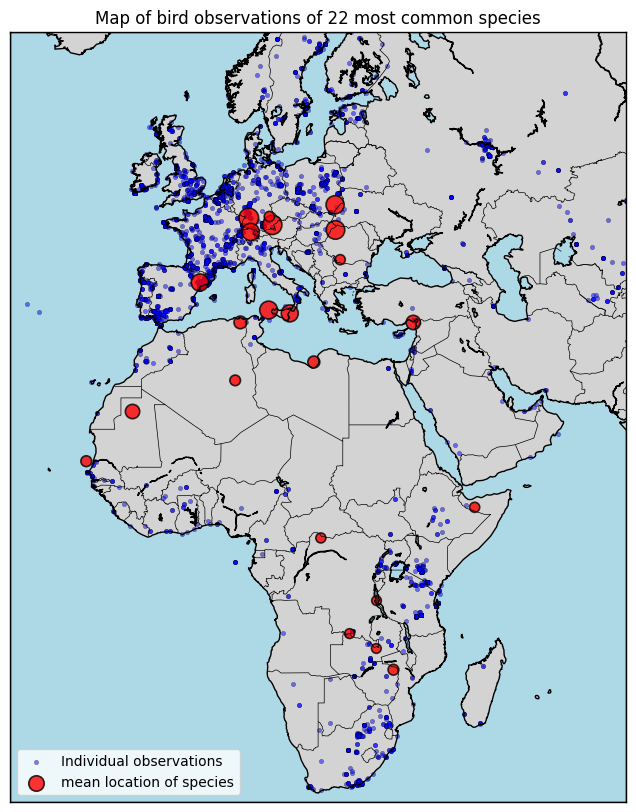

In [17]:

# Die 22 häufigsten 'common_name' Werte ermitteln
top_common_names = df["common_name"].value_counts().head(22).index

# Daten filtern nach den Top 22 häufigsten common_names
filtered_df = df[df["common_name"].isin(top_common_names)]

# Gruppieren nach 'common_name' und den Mittelpunkt der Koordinaten berechnen sowie die Häufigkeit zählen
grouped_df = filtered_df.groupby("common_name").agg(
    latitude=("latitude", "mean"),
    longitude=("longitude", "mean"),
    count=("common_name", "count")
).reset_index()

# Alle Datenpunkte für die 22 häufigsten Arten verwenden
filtered_lats = filtered_df["latitude"].values
filtered_lons = filtered_df["longitude"].values

# Neue Karte mit allen Datenpunkten erstellen
fig, ax = plt.subplots(figsize=(10, 10))
m = Basemap(projection='merc', 
            llcrnrlat=-36, urcrnrlat=65, 
            llcrnrlon=-30, urcrnrlon=70, 
            resolution='l', ax=ax)

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgray', lake_color='lightblue')

# Koordinaten umwandeln
x_all, y_all = m(filtered_lons, filtered_lats)

# Streudiagramm mit besser sichtbaren Markierungen
ax.scatter(x_all, y_all, s=10, c='blue', alpha=0.5, edgecolors="black", linewidth=0.3, label="Individual observations")

# Zentroiden der häufigsten Arten erneut einzeichnen
x_centroid, y_centroid = m(grouped_df["longitude"].values, grouped_df["latitude"].values)
bubble_sizes = grouped_df["count"] / grouped_df["count"].max() * 200  # Größere Blasen
ax.scatter(x_centroid, y_centroid, s=bubble_sizes, c='red', alpha=0.8, edgecolors="black", linewidth=1.2, label="mean location of species")

# Titel und Legende
plt.title("Map of bird observations of 22 most common species")
plt.legend()

# Anzeigen der Karte
plt.show()


               Species  Count
        Common Buzzard    425
      Common Sandpiper    412
        Wood Sandpiper    381
Western Yellow Wagtail    362
    European Bee-eater    350
   Common House-Martin    328
          Barn Swallow    323
          Little Egret    318
            Black Kite    227
           Great Egret    227
    Red-rumped Swallow    178
       Eurasian Hoopoe    158
          Cattle Egret    129
 Black-backed Puffback    128
        Egyptian Goose    124
        Willow Warbler    116
       Great Cormorant    113
       Pied Kingfisher    112
         Common Bulbul    110
           Hadada Ibis    106
      Collared Sunbird    103
  Tawny-flanked Prinia    102
    Rattling Cisticola     89


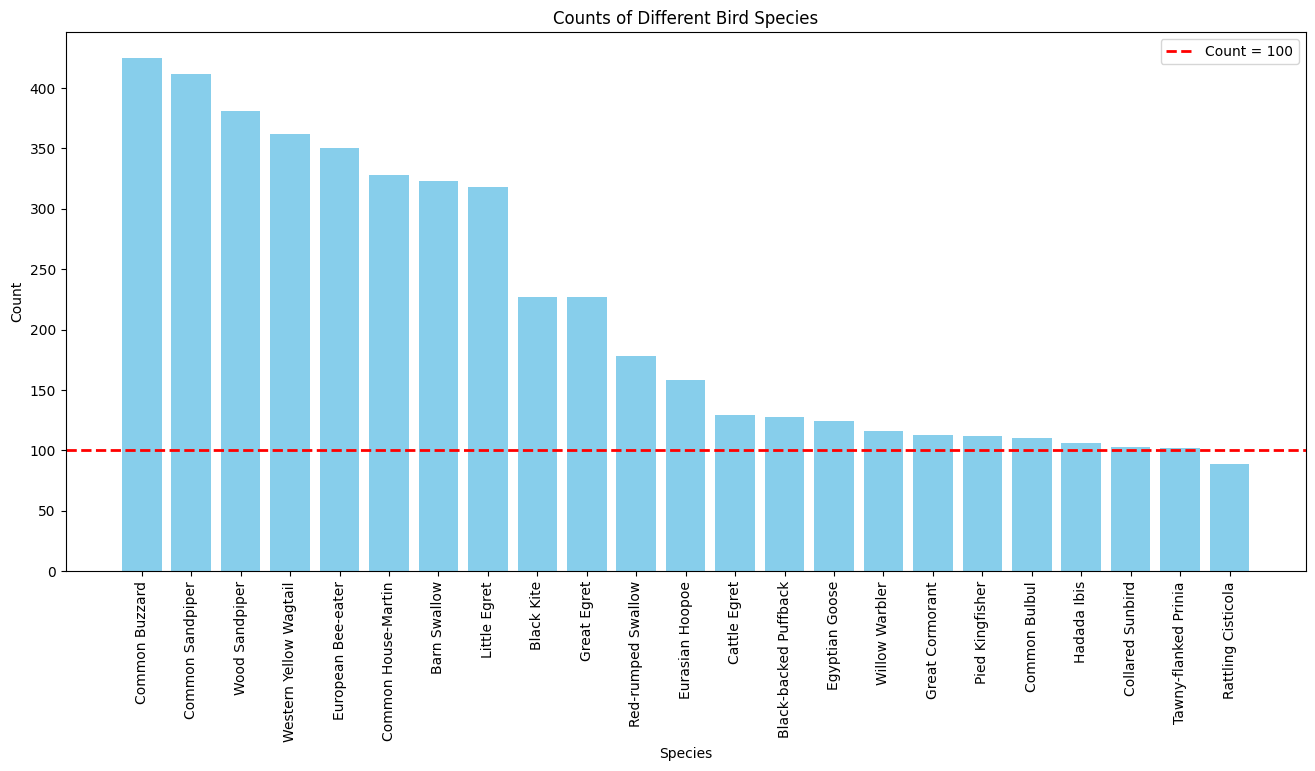

In [33]:
import pandas as pd

data = {
    "Species": [
        "Common Buzzard", "Common Sandpiper", "Wood Sandpiper", "Western Yellow Wagtail",
        "European Bee-eater", "Common House-Martin", "Barn Swallow", "Little Egret",
        "Black Kite", "Great Egret", "Red-rumped Swallow", "Eurasian Hoopoe",
        "Cattle Egret", "Black-backed Puffback", "Egyptian Goose", "Willow Warbler",
        "Great Cormorant", "Pied Kingfisher", "Common Bulbul", "Hadada Ibis",
        "Collared Sunbird", "Tawny-flanked Prinia", "Rattling Cisticola"
    ],
    "Count": [
        425, 412, 381, 362, 350, 328, 323, 318, 227, 227, 178, 158, 129, 128, 124,
        116, 113, 112, 110, 106, 103, 102, 89
    ]
}

df = pd.DataFrame(data)
print(df.to_string(index=False))
# Create a bar plot for the counts of birds
plt.figure(figsize=(16, 7))
plt.bar(df["Species"], df["Count"], color='skyblue')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Counts of Different Bird Species')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.axhline(y=100, color='red', linestyle='--', linewidth=2, label='Count = 100')
plt.legend()
plt.show()
# Add a red line at the 100 count
